# LDA

### Topics for All Comments

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [4]:
# Read toronto restaurant review data
df = pd.read_csv('gs://yelp_review_toronto_restaurant/toronto_restaurant_review.csv', index_col=0)
toronto_restaurant_review = df.text

In [112]:
# Convert a collection of text documents to a matrix of token counts
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')

In [109]:
def fit_lda(data, vectorizer):
    trr = vectorizer.fit_transform(data)
    lda = LatentDirichletAllocation(max_iter=5, 
                                    learning_method='online', learning_offset=50., 
                                    random_state=0).fit(trr)
    return lda

In [20]:
# Define the method to print topic words
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [24]:
# Define the method to return topic words as List
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words.append(' '.join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    return top_words

In [ ]:
lda = fit_lda(toronto_restaurant_review, vectorizer)

In [19]:
print_top_words(lda, vectorizer.get_feature_names(), 20)

Topic #0: came ordered menu restaurant dinner got didn meal night friend table went did time dish server experience wasn really just
Topic #1: sandwich ve best brunch place fries breakfast coffee eggs wings love great toronto time bacon french lunch day sandwiches delicious
Topic #2: pizza pasta seafood appetizer wine italian favorite totally delivery calamari oysters crust toppings pizzas octopus crowded girlfriend mussels entree fresh
Topic #3: food service time order just place wait don minutes like table people didn restaurant asked said got long bad came
Topic #4: sushi lunch salmon rolls roll fish japanese fresh free price salad sashimi quality rice good soup tuna spring 10 special
Topic #5: cheese sauce like sweet good cream bread really salad just ice tea taste delicious nice fresh cake chocolate bit flavour
Topic #6: chicken thai food curry rice spicy fish good tacos fried sauce vegetarian pad chips vegan ve burrito place indian ordered
Topic #7: place good like food bar just 

In [25]:
top_words = get_top_words(lda, vectorizer.get_feature_names(), 20)

### Topics for Single Restaurant Comments

In [119]:
# Find the restaurant which has most comments
business_id_with_most_comments = df.business_id.value_counts().index[0]

In [130]:
# For the sake of own my interest, print the name and score of this restaurant
# Unfortunately, name of the restaurant is in business.json, I looked it up and hard-coded the name here
restaurant_name = 'Pai Northern Thai Kitchen'
restaurant_score = df[df.business_id == business_id_with_most_comments].stars_y.iloc[0]
print(f'The restaurant with most comments in Toronto is: {restaurant_name}')
print(f'The score is: {restaurant_score}')

The restaurant with most comments in Toronto is: Pai Northern Thai Kitchen
The score is: 4.5


In [108]:
# Get all comments for the restaurant
review_for_single_restaurant = df[df.business_id == business_id_with_most_comments].text

In [114]:
lda_single_restaurant = fit_lda(review_for_single_restaurant, vectorizer)

In [115]:
print_top_words(lda_single_restaurant, vectorizer.get_feature_names(), 20)

Topic #0: die yummy totally spring rolls food delicious think serving stand complaints roll pictures depth outside patrons thai wednesday flavours dish
Topic #1: curry thai rice dish sauce chicken ordered beef really soup pad place green coconut ve fried best nice fish yum
Topic #2: morning glory mushroom incredible vegan servers opening canada selection incredibly ksr longer chill regular app dessert delicious mango menu yum
Topic #3: regret overall disappointment terrible needs hype guy service thai food really went tea dish tried definitely yum level tom bamboo
Topic #4: food thai place khao pad soi pork friend beef bomb just ambience braised good enjoyed fried super toronto bit great
Topic #5: uber hop regret hip won winter oily fact honestly amazing needed means bland welcoming filling mean thai walls strong place
Topic #6: food great thai good place authentic service atmosphere busy downtown priced excellent fun wait toronto delicious location price private spot
Topic #7: thai gr

In [116]:
top_words_single_restaurant = get_top_words(lda_single_restaurant, vectorizer.get_feature_names(), 20)

# EDA

## 1. What is the average length of the review?

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Distribution of Character & Word Counts in Reviews

In [ ]:
review_lens = [len(review) for review in df.text]
review_word_lens = [len(review.split()) for review in df.text]

Text(0.5, 0, 'Number of Word Counts')

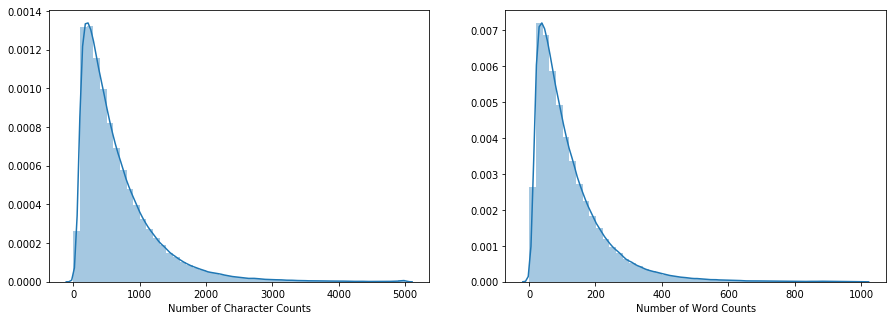

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(review_lens, ax=axs[0])
axs[0].set_xlabel('Number of Character Counts')
sns.distplot(review_word_lens, ax=axs[1])
axs[1].set_xlabel('Number of Word Counts')

### Boxplot of Word Counts in Reviews

Text(0.5, 0, 'Number of Word Counts')

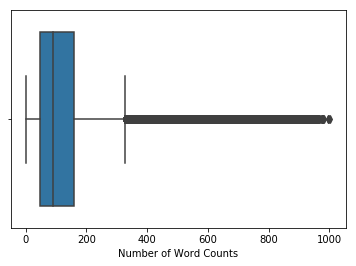

In [71]:
sns.boxplot(x=review_word_lens)
plt.xlabel('Number of Word Counts')

### Statistics of Word Counts in Reviews

In [14]:
print(f'Mean of Word Counts: {np.mean(review_word_lens, dtype=int)}')
print(f'Median of Word Counts: {np.median(review_word_lens)}')
print(f'STD of Word Counts: {np.std(review_word_lens, dtype=int)}')

Mean of Word Counts: 122
Median of Word Counts: 91.0
STD of Word Counts: 108


### Conclusion
As there are some really long reviews, median is used for average.

The average length of reivews are 91 words with std 108 words.

## 2. What're the common topics of all reviews

### Word Cloud for All Reviews

In [28]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [33]:
wordcloud = WordCloud(background_color='white')

In [131]:
def subplot_word_cloud(topic_words, title):
    fig, axs = plt.subplots(3, 3, figsize=(15, 10), sharex=True, sharey=True)
    fig.suptitle(title, fontsize=30)
    for i, ax in enumerate(axs.flatten()):
        fig.add_subplot(ax)
        wc = wordcloud.generate(topic_words[i])
        plt.gca().imshow(wc, interpolation="bilinear")
        plt.axis('off')

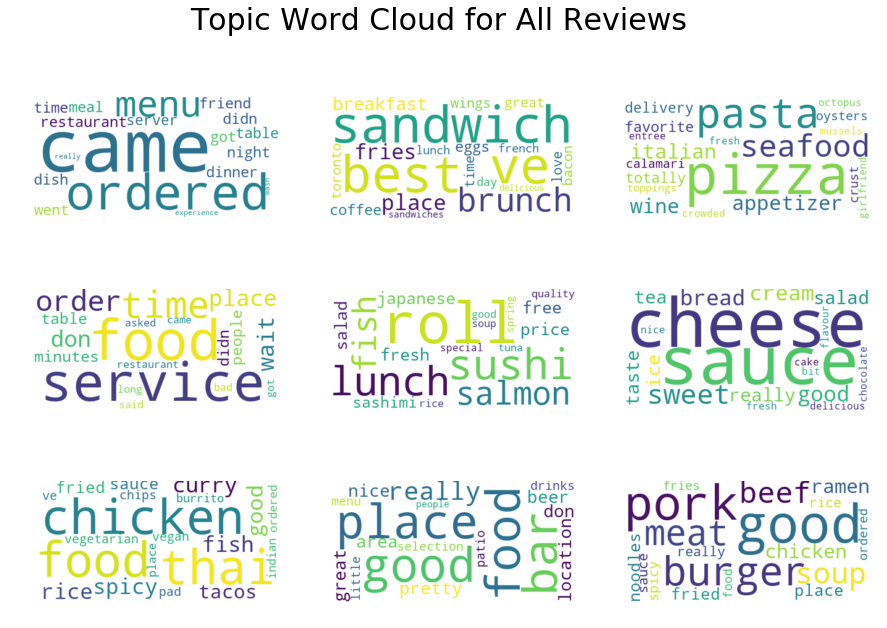

In [134]:
subplot_word_cloud(top_words, 'Topic Word Cloud for All Reviews')

## 3. What are the common topics for the restaurant with most reviews in Toronto?

### Word Clouds for Single Restaurant Reviews

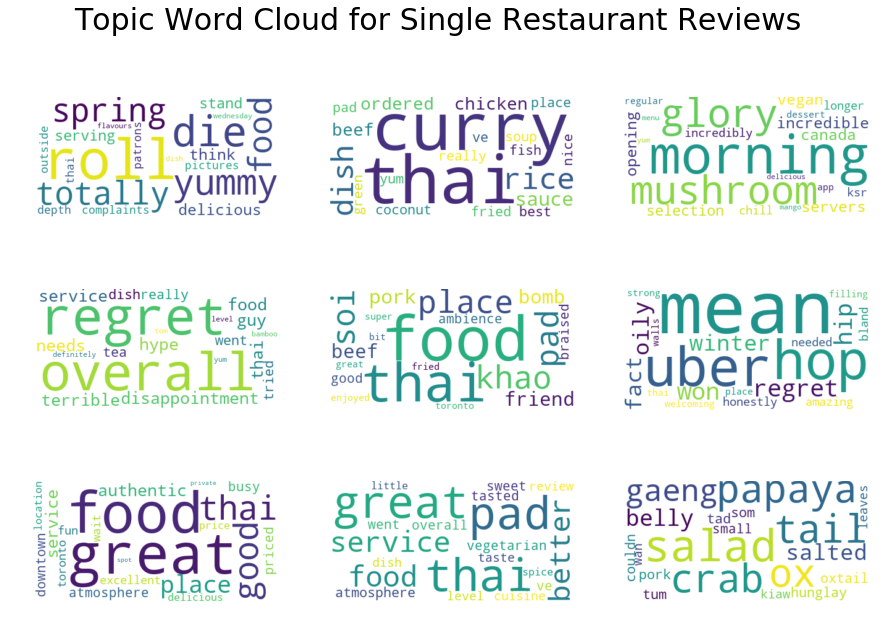

In [133]:
subplot_word_cloud(top_words_single_restaurant, 'Topic Word Cloud for Single Restaurant Reviews')

## 4. There are three labels for reviews (useful, funny, cool), which one do people use more frequently?

### Review Label Counts

Text(0, 0.5, 'Number of Labels')

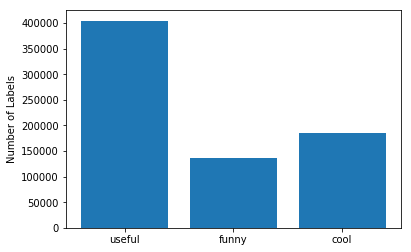

In [97]:
review_labels = ['useful', 'funny', 'cool']
sums = df[review_labels].sum()
index = np.arange(len(sums))

plt.bar(index, sums)
plt.xticks(index, review_labels)
plt.ylabel('Number of Labels')

### Conclusion
People use useful label more often than the other two.